# An introduction to NACA 16 Sections

The NACA 16 sections are described in
- Stack, J. (1940). Tests of Airfoils Designed to Delay the Compressibility Burble
- Lindsey, W., Stevenson, D., Daley, B. (1948). Aerodynamic Characteristics of Naca 16-Series Airfoils at Mach Numbers Between 0.3 and 0.8

But the salient information is that they are commonly-used propeller sections, chosen for high lift to drag ratio. They are described by a *design lift coefficient*, $C_{ld}$, which describes the _camber_ and a thickness-to-chord ratio which describes...well..the thickness to chord ratio.

The design of the aerofoils themselves was originally an inverse design process whereby the aerofoils were designed to give the pressure distribution that yielded the $C_{ld}$ at zero aerodynamic incidence, and this procedure was performed via a potential flow solution. This is discssed by Stack (1940).

Thankfully, Lindsey (1948) gives analytical expressions for the actual shape of the aerofoils based on the design parameters. They are designed by:
- A mean camber line, defined by $C_{ld}$
- A thickness distribution above and below the camber line, defined by $\frac{t}{c}$

## Determining the camber line

The aerofoil sections are defined in terms of a non-dimensional chordwise ordinate, $x$, which is equal to 0 at the leading edge and 1 at the trailing edge.

The camber line is then fully described by the design lift coefficient and the following equation gives the vertical displacement of the camber line, $y_c$ as a function of $x$:

$$y_c = -\frac{C_{ld}}{4\pi}\left[x\ln x + (1-x)\ln\left(1-x\right)\right]$$

So now we can determine the camber lines for various design lift coefficients:

(-0.05, 1.05, -0.0071701292400786765, 0.029232065363397685)

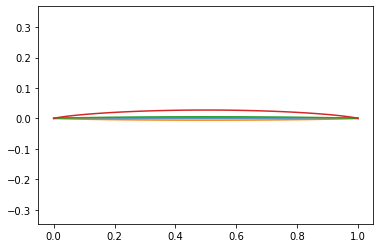

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import log, pi

# set our x ordinate as a vector
x = np.linspace(0, 1, 100) 

# make a function that returns the camber line based on an input X and the Cld
# this could be done as a list comprehension except for when x =0 or 1 which causes a math domain error
# if anyone wants to tackle this as a list comprehension that would be super
def yc(X, Cld):
    yc = np.zeros(X.size)
    for i in range(len(X)):
        if X[i] == 0 or X[i] == 1:
            yc[i] = 0
        else:
            yc[i] = -(Cld/(4*pi))*(X[i]*log(X[i]) + (1-X[i])*log(1-X[i]))

    return yc        
        

# First we'll plot a Cld = 0 (boring) aerofoil camber line, and then some negative and two positive cambers
Clds = [0, -.1, 0.1, .5]
for Cld in Clds:
    plt.plot(x, yc(x, Cld))

plt.axis('equal') # <=== Try uncommenting this line and seeing what happens

## Determining the upper and lower surfaces

The upper and lower surfaces are described by some nasty-looking polynomial functions, which describe the symmetric thickness above and below the camber line. That is, for the upper surface we add a thickness and for the lower surface we subtract the thickness.

There are two polynomial functions - one describes the distribution from $x=0$ to $x=0.5$, and one describes the distribution from $x=0.5$ to $x=1$. These are denoted $y_1$ and $y_2$, and are a function of $x$ and the thickness-to-chord ratio, $\frac{t}{c}$:

$$y_1 = 0.01\cdot \frac{t}{c}\cdot \left(0.989665\cdot x^\frac{1}{2} - 0.239250\cdot x - 0.041000\cdot x^2 - 0.559400\cdot x^3\right)$$

$$y_2 = 0.01\cdot \frac{t}{c}\cdot \left(0.01 + 2.325000\cdot (1-x) - 3.42\cdot (1-x)^2 + 1.46\cdot (1-x)^3\right)$$

The equations above give the thickness in non-dimensional form - that is, they are on a scale that gives a sensible plot but assuming a unit chord.

For a given thickness, say 20%, the y line can now be determined:

(-0.05, 1.05, -0.01101970792782856, 0.09388963827289358)

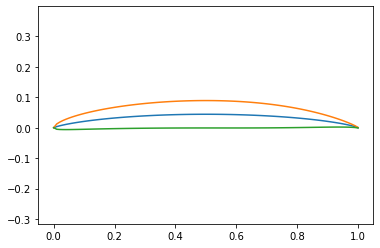

In [2]:
# First we split up the chord line into two sections
x1 = x[x <= .5]
x2 = x[x > .5]


# Input the thickness as a percentage
t_c = 9

# Create the two distributions y1 and y2, using "list comprehension" (google it if you dont know what it is)
y1 = [0.01*t_c*(0.989665*x**.5 - 0.239250*x - 0.041000*x**2 - 0.559400*x**3) for x in x1]
y2 = [0.01*t_c*(0.01 + 2.325000*(1-x) - 3.42*(1-x)**2 + 1.46*(1-x)**3) for x in x2]
y = y1 + y2 # Note - this is concatenating the two lists, not adding them

# Let's take a given aerofoil with a Cld of 0.5 and get the camber line, then get the upper and lower surfaces
camberline = yc(x, 0.8)
yu = camberline + y
yl = camberline - y

# Now plot them all
plt.figure()
plt.plot(x, camberline)
plt.plot(x, yu)
plt.plot(x, yl)
plt.axis('equal')


## Lift and drag characterstics

With results taken from the Stack paper - Figure 4 can be digitised and reproduced:



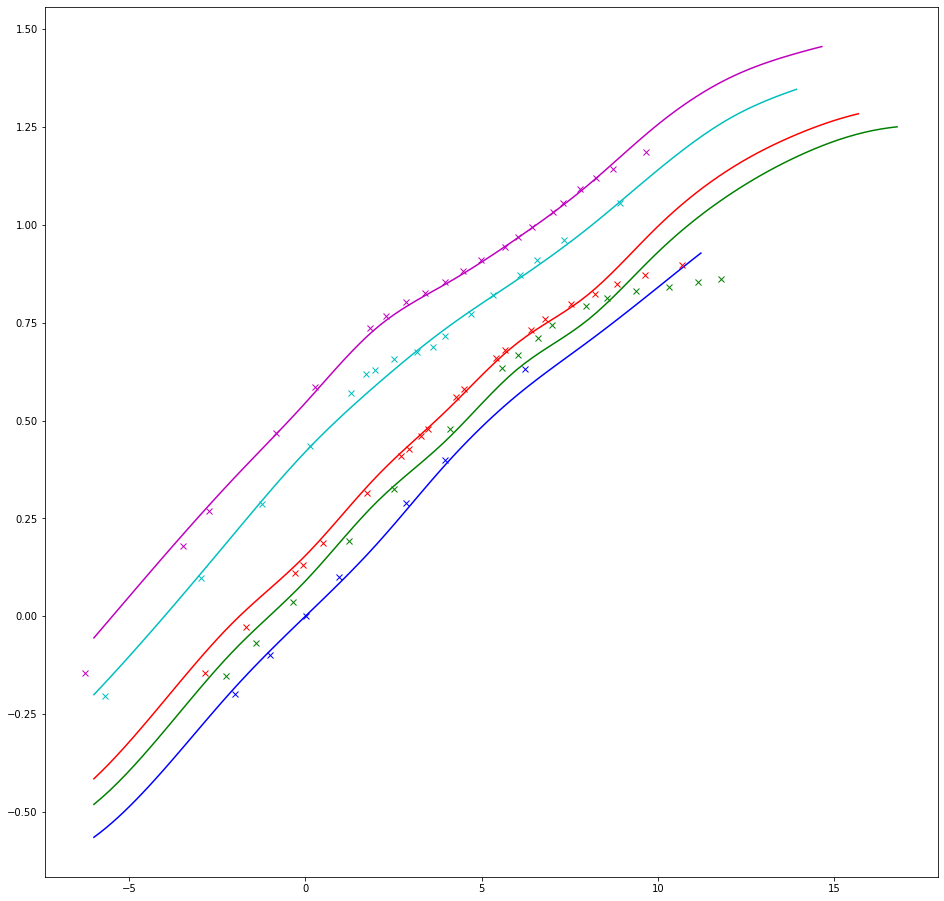

In [6]:
import csv
import matplotlib.pyplot as plt 
import Databank
 
StackFigure = 'StackFigure4.csv'

# Load in the .csv file
datafile = open(StackFigure, 'r')
datareader = csv.reader(datafile)

# Make a large figure
plt.figure(figsize=(16,16))

# Make some empty lists to store ALL data in
CLs = []
alfas = []

CLds = [0, 0.1, 0.2, 0.5, 0.7, 1.0]
tcs = 9

# Run through the CSV file line by line
i = 0
colours = ['b', 'g', 'r', 'c', 'm', 'k']
for row in datareader:   
    if len(row) == 2:     # Then this line has entries - otherwise it is blank
        if row[0] == 'x':     # This must be a header line if the first entry is 'x'
            alfa = []             # In which case the lists for alpha and CL are reset/initilised as empty lists
            CL = []
        else:
            alfa = alfa + [row[0]] # This point is only reached if we have initilised the alpha/CL lists, and then the entries are appended to them
            CL = CL + [row[1]]

    else:       
        # Turn the list of strings into floats and then into np arrays
        alfa = np.array([float(i) for i in alfa])
        CL = np.array([float(i) for i in CL])
        
        # Add them into the global lists (who knows? Maybe we'll use them later?)
        alfas.append(alfa)
        CLs.append(CL)

        # Plot them
        plt.plot(alfa, CL, 'x', color=colours[i])
        
        # Get the databank values:
        
        Clfunct, Cdfunct, Clfunctsup, Cdfunctsup = Databank.MakeInterpolants(CLds[i], tcs/100)

        
        alfarange = np.linspace(max(alfa.min()-5, -6), alfa.max()+5, 100)
        Clrange = [Clfunct(a, 0.3) for a in alfarange]
        
        # Plot this
        plt.plot(alfarange, Clrange, color=colours[i])
        i = i + 1
        
plt.show()


Text(0.5, 1.0, 'Comparison of databank and WT data - $C_{ld}$=0.00, $\\frac{t}{c}$=0.09')

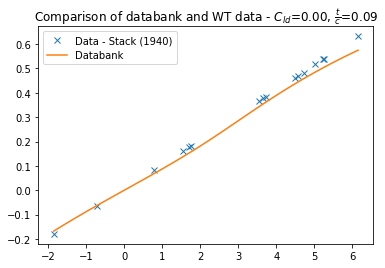

In [8]:
Cld = 0
tc = 0.09

alfa1 = np.array([-1.8584, -0.7117, 0.7923, 1.5442, 1.7134, 1.751, 3.5368, 3.6496, 3.7248, 4.4955, 4.5707, 4.7212, 5.0218, 5.228 , 5.2474, 6.1497])
Cl1 = [-0.179661, -0.063513, 0.083354, 0.162065, 0.177424, 0.181263, 0.364603, 0.377081, 0.38476, 0.461553, 0.469232, 0.482671, 0.517226, 0.537384, 0.540263, 0.632413]

plt.plot(alfa1, Cl1, 'x', label='Data - Stack (1940)')

import Databank

Clfunct, Cdfunct, Clfunctsup, Cdfunctsup = Databank.MakeInterpolants(Cld, tc)

alfarange = np.linspace(alfa1.min(), alfa1.max(), 100)
Clrange = [Clfunct(a, 0.3) for a in alfarange]


plt.plot(alfarange, Clrange, label='Databank')
plt.legend()
plt.title("Comparison of databank and WT data - $C_{{ld}}$={:1.2f}, $\\frac{{t}}{{c}}$={:1.2f}".format(Cld, tc))

Text(0.5, 1.0, 'Comparison of databank and WT data - $C_{ld}$=0.70, $\\frac{t}{c}$=0.09')

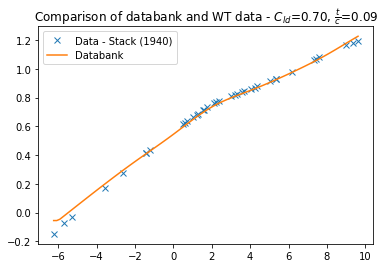

In [9]:
Cld = 0.7
tc = 0.09

alfa1 = np.array([-6.2352, -5.6717, -5.296, -3.5674, -2.6467, -1.4441, -1.444, -1.2372, 0.5109, 0.6237, 0.7365, 0.9996, 1.2067, 1.263, 1.5261, 1.5826, 1.7518, 2.1092, 2.2221, 2.3915, 2.994, 3.2202, 3.333, 3.559, 3.6908, 4.0486, 4.2558, 4.3687, 5.0276, 5.3289, 5.3477, 6.1571, 7.3238, 7.4368, 7.5873, 9.0179, 9.357, 9.6206])
Cl1 = [-0.148204, -0.075259, -0.031107, 0.172379, 0.278921, 0.414261, 0.412342, 0.43346, 0.614879, 0.623519, 0.635038, 0.665753, 0.677276, 0.684954, 0.712791, 0.716631, 0.73295, 0.76175, 0.770391, 0.779993, 0.813602, 0.81841, 0.82801, 0.839534, 0.844337, 0.863543, 0.870269, 0.87891, 0.916359, 0.930765, 0.931725, 0.981655, 1.062304, 1.069025, 1.081505, 1.166005, 1.179453, 1.191938]

plt.plot(alfa1, Cl1, 'x', label='Data - Stack (1940)')

import Databank

Clfunct, Cdfunct, Clfunctsup, Cdfunctsup = Databank.MakeInterpolants(Cld, tc)

alfarange = np.linspace(alfa1.min(), alfa1.max(), 100)
Clrange = [Clfunct(a, 0.3) for a in alfarange]

plt.plot(alfarange, Clrange, label='Databank')
plt.legend()
plt.title("Comparison of databank and WT data - $C_{{ld}}$={:1.2f}, $\\frac{{t}}{{c}}$={:1.2f}".format(Cld, tc))